In [1]:
%matplotlib inline
import sys
import os
import time
import numpy as np

In [2]:
import infomap

In [3]:
import community_detection
import utils

We reduce the dimensionality of a large spatiotemporal dataset such as SST by using community detection.
Infomap is a powerful algorithm decomposing a network in sets of communities.

The methodology has 2 main cons for spatiotemporal data analysis: (a) the communities are not spatially contiguous and (b) every grid cell will be assigned to a community (we may cluster even grid points that are just noise). 

If (a) and (b) are a problem for you, then use d-Maps https://github.com/FabriFalasca/py-dMaps

Infomap can be often useful as is it is very fast.

In [4]:
path = './COBEv2_sst_2by2_1980_2015_a_detrend.nc'
climate_variable = 'sst'
lon_variable = 'lon'
lat_variable = 'lat'
rand_samples = 10000
alpha = 0.01

gridded_domains, signals, domain_map = community_detection.infomap_communities(path,climate_variable,lon_variable,lat_variable,
                            rand_samples, alpha)

Starting K inference
Random sample set to 10000
Significance for tau inference set to alpha = 0.01
Number of significant correlations: 969
K = 0.40507792309282553
Computing the correlation matrix
Computing the adjacency matrix
Community detection via Infomap
Found 22 communities
Weighting time series
Computing signals
Embed communities in the map


/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/CM4/networks/piControl/community_detection/community_detection.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  modes_indices = np.array(modes_indices)


# Plotting

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [8]:
# Define longitude and latitudes
import utils

path = './COBEv2_sst_2by2_1980_2015_a_detrend.nc'

lon = utils.load_data(path,'lon')
lon = utils.masked_array_to_numpy(lon)

lat = utils.load_data(path,'lat')
lat = utils.masked_array_to_numpy(lat)

## Map with all communities

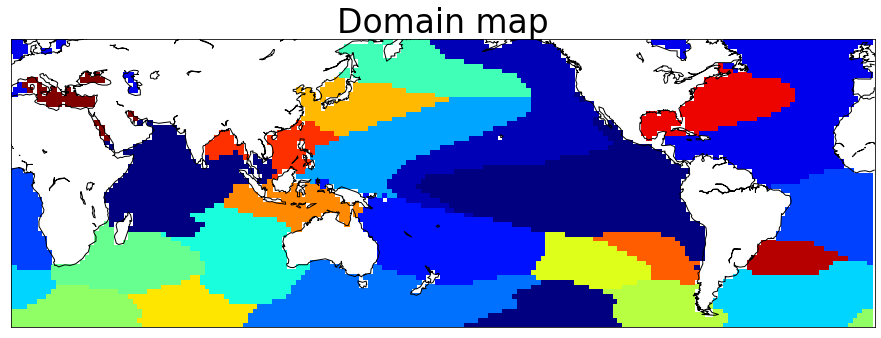

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
    
map = Basemap(projection='cyl',
              llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=0,urcrnrlon=360)
map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
#map.fillcontinents(color = 'black')
    
    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(lon,lat,domain_map,cmap=plt.cm.jet)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
    
plt.title('Domain map', fontsize = 33)

plt.show()

## Communities + standardized signals

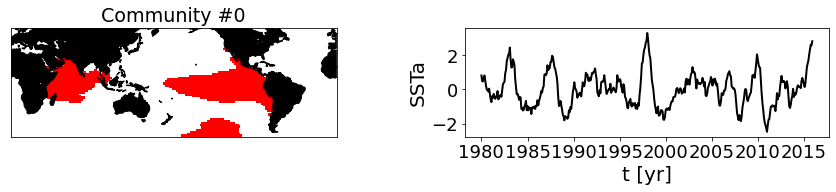

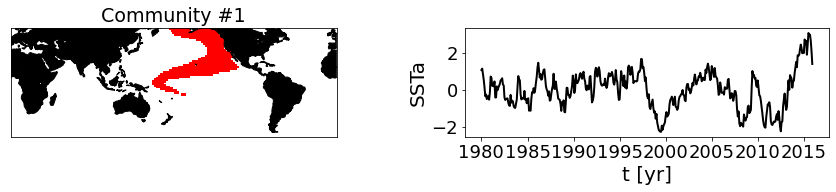

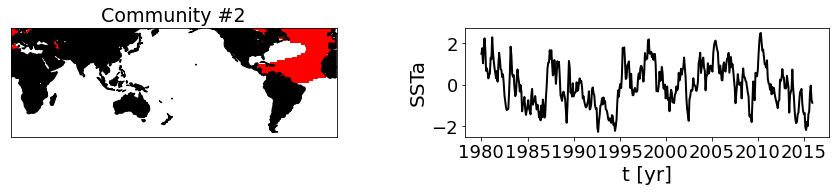

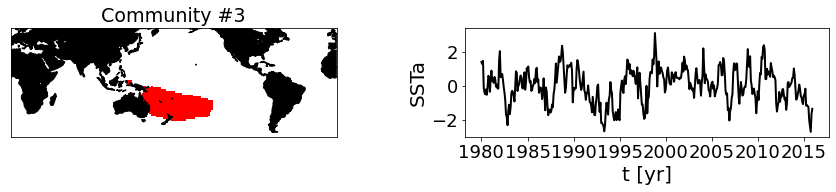

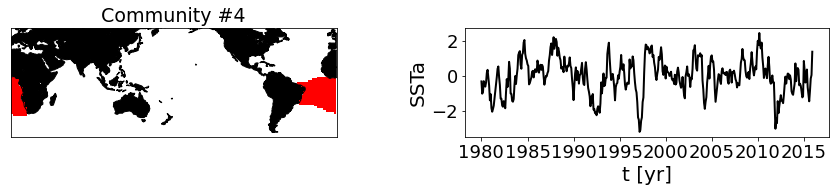

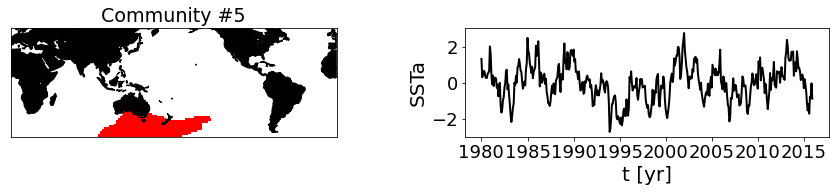

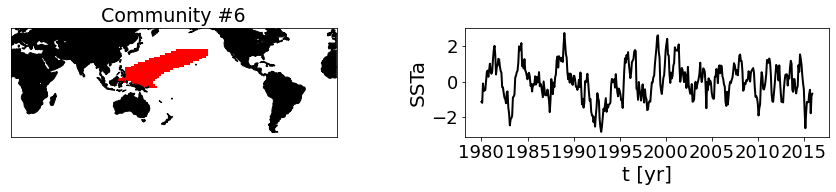

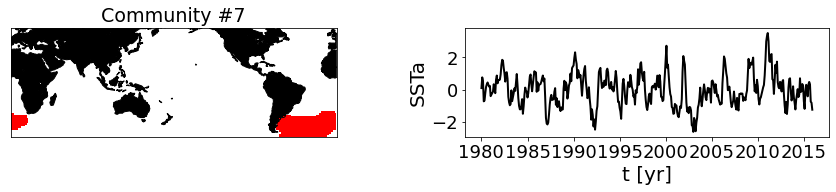

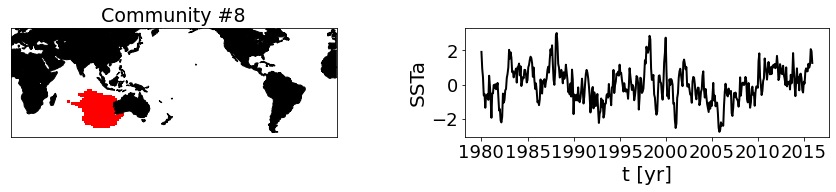

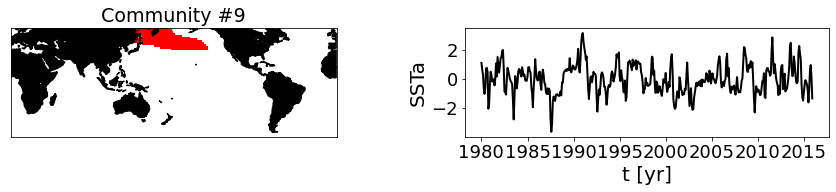

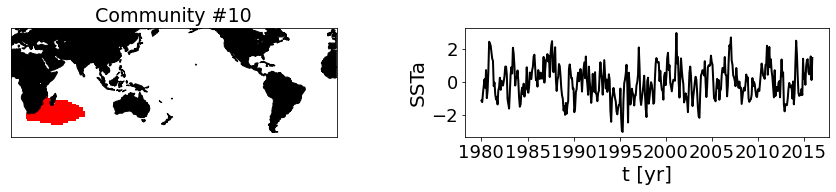

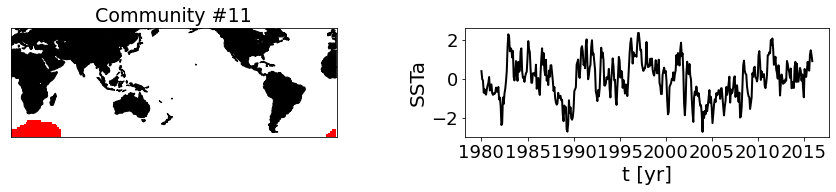

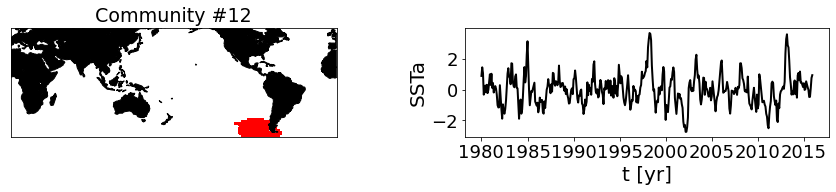

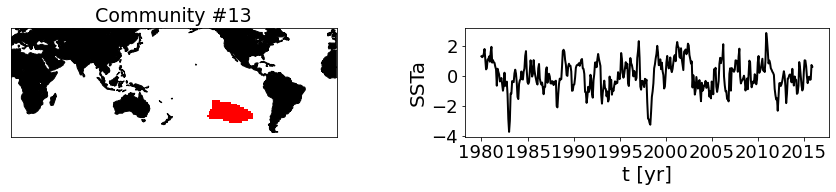

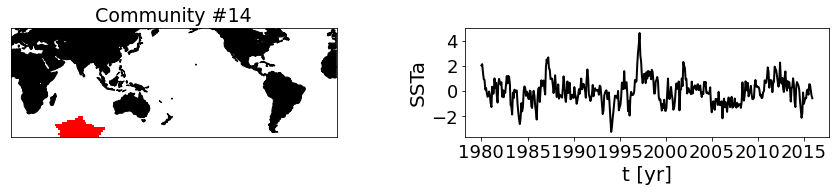

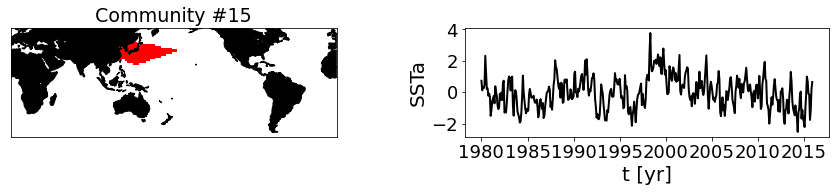

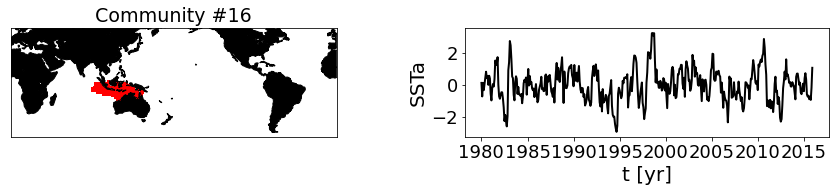

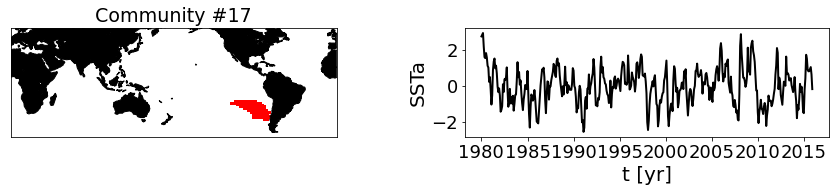

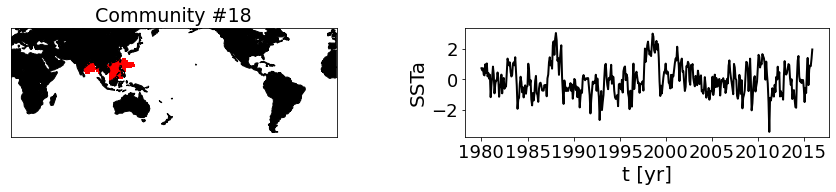

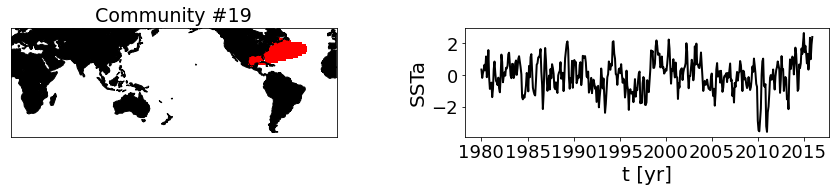

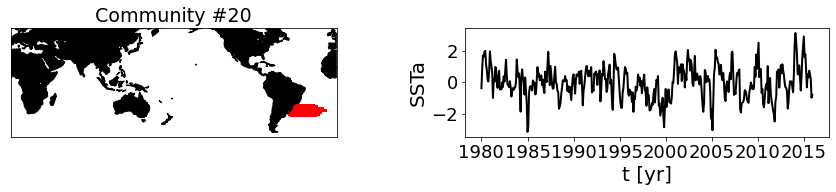

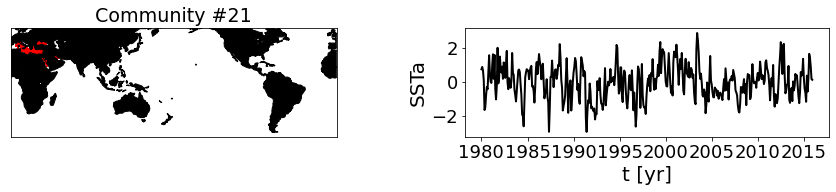

In [29]:
# For plotting define a new array with np.nan instead of zeros
domains_to_plot = gridded_domains.copy()
domains_to_plot[domains_to_plot==0] = np.nan

# Let's look at all average signals
for i in range(len(signals)):
    
    
    fig = plt.figure(figsize=(15,2))

    ax = fig.add_subplot(121)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
                llcrnrlon=0,urcrnrlon=360)
    map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
    map.fillcontinents(color = 'black')


    map.pcolor(lon,lat,domains_to_plot[i],cmap=plt.cm.prism)
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('Community #'+str(i), fontsize = 19)

    
    ax = fig.add_subplot(122)  
    
    plt.plot(signals[i]/np.std(signals[i]),"-k",linewidth = 2)
    plt.xlabel('t [yr]',fontsize = 20)
    ax.set_xticks([0,60,120,180,240,300,360,420])
    ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015'])
    plt.ylabel('SSTa',fontsize = 20)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.subplots_adjust(wspace=0.3, hspace=0)
    
    
    plt.show()